# Nano Neuron in python

This is a python port over @trekhleb 's excellent project here: https://github.com/trekhleb/nano-neuron

> NanoNeuron is an over-simplified version of the Neuron concept from Neural Networks. NanoNeuron is trained to convert temperature values from Celsius to Fahrenheit.

In [67]:
import random

import matplotlib.pyplot as plt
import numpy as np

## The NanoNeuron model
> Let's implement our NanoNeuron model function. It implements basic linear dependency between x and y which looks like `y = w * x + b`.

In [68]:
class NanoNeuron:
    def __init__(self, w: float, b: float):
        self.w = w
        self.b = b

    def predict(self, x: float) -> float:
        return x * self.w + self.b

## Celsius to Fahrenheit conversion

> The temperature value in Celsius can be converted to Fahrenheit using the following formula: `f = 1.8 * c + 32`, where `c` is a temperature in Celsius and `f` is the calculated temperature in Fahrenheit.

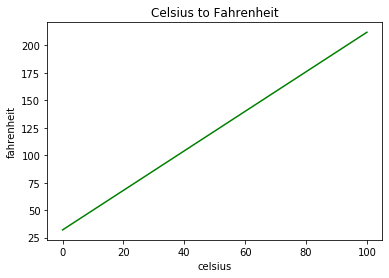

In [69]:
def celsius_to_fahrenheit(c: float) -> float:
    w = 1.8
    b = 32
    f = c * w + b
    return f

# Plot Celsius to Fahrenheit function
fig, axes = plt.subplots()
axes.set_title("Celsius to Fahrenheit")
axes.set(ylabel="fahrenheit", xlabel="celsius")

x = np.linspace(0,100,100)
y = celsius_to_fahrenheit(x)

axes.plot(x,y, 'g')

plt.show()

## Generating data-sets

> Before the training we need to generate training and test data-sets based on the celsius_to_fahrenheit() function. Data-sets consist of pairs of input values and correctly labeled output values.

In [70]:
def generate_data_sets():
    # x_train -> [0, 1, 2, ...],
    # yTrain -> [32, 33.8, 35.6, ...]
    x_train = []
    y_train = []

    for x in range(100):
        x_train.append(x)
        y_train.append(celsius_to_fahrenheit(x))

    # xTest -> [0.5, 1.5, 2.5, ...]
    # yTest -> [32.9, 34.7, 36.5, ...]
    x_test = []
    y_test = []

    # By starting from 0.5 and using the same step of 1 as we have used for training set
    # we make sure that test set has different data comparing to training set.
    for x in range(100):
        x += .5
        x_test.append(x)
        y_test.append(celsius_to_fahrenheit(x))

    return x_train, y_train, x_test, y_test

## The cost (the error) of prediction

> We need to have some metric that will show us how close our model's prediction is to correct values. 

In [71]:
def predictionCost(y, prediction):
  return (y - prediction) ** 2 / 2

## Forward propagation

> To do forward propagation means to do a prediction for all training examples from `x_train` and `y_train` data-sets and to calculate the average cost of those predictions along the way.

In [72]:
def forward_propagation(model, x_train, y_train):
    m = len(x_train)
    predictions = []
    cost = 0
    
    for i in range(m):
        prediction = model.predict(x_train[i])
        cost += predictionCost(y_train[i], prediction)
        predictions.append(prediction)

    # We are interested in average cost.
    cost /= m
    return predictions, cost

## Backward propagation

> When we know how right or wrong our NanoNeuron's predictions are (based on average cost at this point) what should we do to make the predictions more precise?

In [73]:
def backward_propagation(predictions, x_train, y_train):
    m = len(x_train)
    # At the beginning we don't know in which way our parameters 'w' and 'b' need to be changed.
    # Therefore we're setting up the changing steps for each parameters to 0.
    dW = 0
    dB = 0

    for i in range(m):
        dW += (y_train[i] - predictions[i]) * x_train[i]
        dB += y_train[i] - predictions[i]
    
    # We're interested in average deltas for each params.
    dW /= m
    dB /= m
    return dW, dB

## Training the model

> Now we know how to evaluate the correctness of our model for all training set examples (forward propagation). We also know how to do small adjustments to parameters w and b of our NanoNeuron model (backward propagation). 

In [74]:
def train(model, epochs, alpha, x_train, y_train):
    # The is the history array of how NanoNeuron learns.
    cost_history = []

    # Let's start counting epochs.
    for epoch in range(epochs):
        # Forward propagation.
        predictions, cost = forward_propagation(model, x_train, y_train)
        cost_history.append((model.w, model.b, cost))

        # Backward propagation.
        dW, dB = backward_propagation(predictions, x_train, y_train)

        # Adjust our NanoNeuron parameters to increase accuracy of our model predictions.
        model.w += alpha * dW
        model.b += alpha * dB

    return cost_history

## Putting all the pieces together

> Now let's use the functions we have created above.

In [75]:
import random

neuron = NanoNeuron(w=random.random(), b=random.random())

x_train, y_train, x_test, y_test = generate_data_sets()

training_cost_history = train(
    neuron,
    epochs=10000,
    alpha=0.0005,
    x_train=x_train,
    y_train=y_train
)

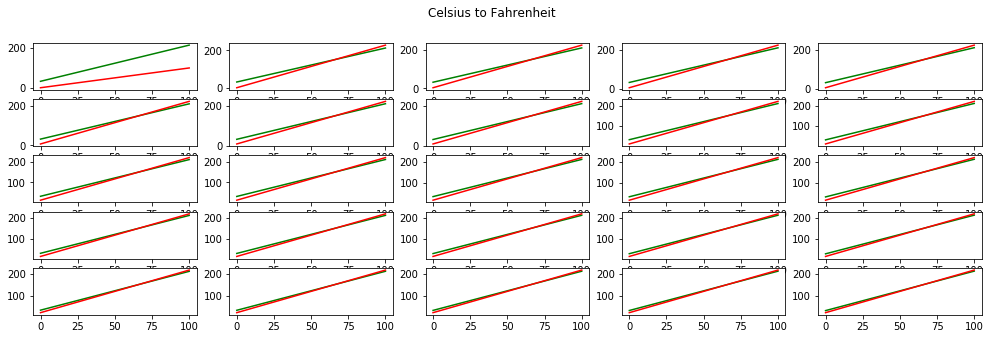

In [79]:
# Plot Celsius to Fahrenheit function
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(17, 5))

for idx, ax in enumerate(axes.flatten()):
    fig.suptitle("Celsius to Fahrenheit")

    w, b, _ = training_cost_history[len(training_cost_history)//25*idx]
    x = np.linspace(0,100,100)
    ax.plot(x,celsius_to_fahrenheit(x), 'g')
    ax.plot(x,NanoNeuron(w=w, b=b).predict(x), 'r')

plt.show()

In [77]:
print('Cost before the training:', training_cost_history[0])
print('Cost after the training:', training_cost_history[-1])

print(f"w={neuron.w},b={neuron.b}")

Cost before the training: (0.9835321530840432, 0.03413692948406821, 2897.236587455074)
Cost after the training: (1.9354613869381692, 23.01508897084427, 10.243205263263407)
w=1.9354442029040344,b=23.01622875703213


In [78]:
neuron.predict(70)

158.49732296031453